In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.neighbors import LocalOutlierFactor
import scipy.stats as stats
from scipy.stats import poisson
from scipy.stats import norm

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("workdata.csv") # upload dataset via pandas

In [3]:
df.head() # looked columns and first 5 rows of dataset

Statistic Label  Year  Domestic  \
0  Number of Trips by Irish Residents  2000  Domestic   
1  Number of Trips by Irish Residents  2000  Domestic   
2  Number of Trips by Irish Residents  2000  Domestic   
3  Number of Trips by Irish Residents  2000  Domestic   
4  Number of Trips by Irish Residents  2000  Domestic   

           Reason for Journey      UNIT   VALUE  
0     All reasons for journey  Thousand  5478.0  
1                     Holiday  Thousand  2516.0  
2                    Business  Thousand   554.0  
3  Visiting friends/relatives  Thousand  1800.0  
4      Education and training  Thousand     NaN

In [4]:
df.shape # checked how many columns and rows dataset has

(1536, 6)

In [5]:
df.describe(include=object) # checked details of rows

Statistic Label  Domestic       Reason for Journey  \
count                                 1536      1536                     1536   
unique                                   4         2                        8   
top     Number of Trips by Irish Residents  Domestic  All reasons for journey   
freq                                   384       768                      192   

            UNIT  
count       1536  
unique         3  
top     Thousand  
freq         768

In [6]:
df["UNIT"].unique() # showed what "UNIT" feature has

array(['Thousand', 'Nights per Trip', 'Euro Million'], dtype=object)

In [7]:
df=df.drop('UNIT', axis=1) # as we have seen above , "UNIT" column has unnecessary rows.
                           # it had to remove

In [8]:
df.head() #looked columns and first 5 rows of new dataset

Statistic Label  Year  Domestic  \
0  Number of Trips by Irish Residents  2000  Domestic   
1  Number of Trips by Irish Residents  2000  Domestic   
2  Number of Trips by Irish Residents  2000  Domestic   
3  Number of Trips by Irish Residents  2000  Domestic   
4  Number of Trips by Irish Residents  2000  Domestic   

           Reason for Journey   VALUE  
0     All reasons for journey  5478.0  
1                     Holiday  2516.0  
2                    Business   554.0  
3  Visiting friends/relatives  1800.0  
4      Education and training     NaN

In [9]:
#above in first column which called " Statistic Label" , had  4 different unique.
#these 4 different unique rows transfered to columns in order to split values.
df2=df.pivot_table(index=["Year","Domestic","Reason for Journey"], columns='Statistic Label', 
                   values='VALUE', aggfunc='first',dropna = False).reset_index()

In [10]:
df2.head() # looked columns and first 5 rows of new dataset

Statistic Label  Year  Domestic       Reason for Journey  \
0                2000  Domestic  All reasons for journey   
1                2000  Domestic                 Business   
2                2000  Domestic   Education and training   
3                2000  Domestic                  Holiday   
4                2000  Domestic            Other reasons   

Statistic Label  Average Length of Stay by Irish Residents  \
0                                                      3.8   
1                                                      3.0   
2                                                      NaN   
3                                                      4.6   
4                                                      3.2   

Statistic Label  Estimated Expenditure by Irish Residents  \
0                                                   706.6   
1                                                   109.5   
2                                                     NaN   
3                                                   447.7   
4                                                    68.1   

Statistic Label  Number of Nights by Irish Residents  \
0                                            20703.0   
1                                             1672.0   
2                                                NaN   
3                                            11465.0   
4                                             1916.0   

Statistic Label  Number of Trips by Irish Residents  
0                                            5478.0  
1                                             554.0  
2                                               NaN  
3                                            2516.0  
4                                             607.0

In [11]:
df2.tail() # looked last 5 rows of new dataset

Statistic Label  Year  Domestic          Reason for Journey  \
379              2023  Outbound                     Holiday   
380              2023  Outbound               Other reasons   
381              2023  Outbound             Sporting events   
382              2023  Outbound  Visiting friends/relatives   
383              2023  Outbound       Work/looking for work   

Statistic Label  Average Length of Stay by Irish Residents  \
379                                                    6.6   
380                                                    5.4   
381                                                    NaN   
382                                                    6.9   
383                                                    NaN   

Statistic Label  Estimated Expenditure by Irish Residents  \
379                                                8561.0   
380                                                 633.0   
381                                                   NaN   
382                                                2459.0   
383                                                   NaN   

Statistic Label  Number of Nights by Irish Residents  \
379                                          47660.0   
380                                           4572.0   
381                                              NaN   
382                                          24469.0   
383                                              NaN   

Statistic Label  Number of Trips by Irish Residents  
379                                          7271.0  
380                                           849.0  
381                                             NaN  
382                                          3530.0  
383                                             NaN

In [12]:
df2.shape # new dataset has 1/4 rows of first dataset

(384, 7)

In [13]:
# when the column which called "Reason for Journey" is being examined , has been noticed that the value of row which is "All reasons for journey" 
# is sum of "Business", "Education and training", "Holiday", " Other reasons", "Sporting events", "Visiting friends/relatives" and
# "Work/looking for work". Therefore every row which named "All reasons for journey" could have been removed.
df3=pd.DataFrame(df2)
print(df3)
df3_filtered=df3[df3['Reason for Journey'] != "All reasons for journey"]
print(df3_filtered)

Statistic Label  Year  Domestic          Reason for Journey  \
0                2000  Domestic     All reasons for journey   
1                2000  Domestic                    Business   
2                2000  Domestic      Education and training   
3                2000  Domestic                     Holiday   
4                2000  Domestic               Other reasons   
..                ...       ...                         ...   
379              2023  Outbound                     Holiday   
380              2023  Outbound               Other reasons   
381              2023  Outbound             Sporting events   
382              2023  Outbound  Visiting friends/relatives   
383              2023  Outbound       Work/looking for work   

Statistic Label  Average Length of Stay by Irish Residents  \
0                                                      3.8   
1                                                      3.0   
2                                                      Na

In [14]:
df3_filtered.head() # looked columns and first 5 rows of new dataset

Statistic Label  Year  Domestic      Reason for Journey  \
1                2000  Domestic                Business   
2                2000  Domestic  Education and training   
3                2000  Domestic                 Holiday   
4                2000  Domestic           Other reasons   
5                2000  Domestic         Sporting events   

Statistic Label  Average Length of Stay by Irish Residents  \
1                                                      3.0   
2                                                      NaN   
3                                                      4.6   
4                                                      3.2   
5                                                      NaN   

Statistic Label  Estimated Expenditure by Irish Residents  \
1                                                   109.5   
2                                                     NaN   
3                                                   447.7   
4                                                    68.1   
5                                                     NaN   

Statistic Label  Number of Nights by Irish Residents  \
1                                             1672.0   
2                                                NaN   
3                                            11465.0   
4                                             1916.0   
5                                                NaN   

Statistic Label  Number of Trips by Irish Residents  
1                                             554.0  
2                                               NaN  
3                                            2516.0  
4                                             607.0  
5                                               NaN

In [15]:
df3_filtered.shape # as we see new dataset, total numbers of new row in 'Reason for Journey' column has been converted 
                   #7/8 of previous rows in 'Reason for Journey' column

(336, 7)

In [16]:
df3_filtered.describe(include=object) #checked details of new rows

Statistic Label  Domestic Reason for Journey
count                 336                336
unique                  2                  7
top              Domestic           Business
freq                  168                 48

In [17]:
# Some columns have been renamed in order to make easy to next steps
df4_filtered = pd.DataFrame(df3_filtered)
df4_filtered.rename(columns={'Average Length of Stay by Irish Residents' : 'ALOS',
                             'Estimated Expenditure by Irish Residents' : 'ESEX',
                             'Number of Nights by Irish Residents' : 'NUON',
                             'Number of Trips by Irish Residents' : 'NUOT'}, inplace = True)


df4_filtered.head()             

Statistic Label  Year  Domestic      Reason for Journey  ALOS   ESEX     NUON  \
1                2000  Domestic                Business   3.0  109.5   1672.0   
2                2000  Domestic  Education and training   NaN    NaN      NaN   
3                2000  Domestic                 Holiday   4.6  447.7  11465.0   
4                2000  Domestic           Other reasons   3.2   68.1   1916.0   
5                2000  Domestic         Sporting events   NaN    NaN      NaN   

Statistic Label    NUOT  
1                 554.0  
2                   NaN  
3                2516.0  
4                 607.0  
5                   NaN

### Columnd Dictionary
- ALOS = Average Length of Stay by Irish Residents(Nights per Trip)
- ESEX = Estimated Expenditure by Irish Residents(Euro Million)
- NUON = Number of Nights by Irish Residents(Thousand)
- NUOT = Number of Trips by Irish Residents(Thousand)

In [19]:
df4_filtered.describe() # checked some matmematicasl details of numerical columns

Statistic Label        Year        ALOS         ESEX          NUON  \
count             336.00000  252.000000   252.000000    252.000000   
mean             2011.50000    5.360317   691.859524   7218.107143   
std                 6.93251    3.471250  1182.081070  10257.771207   
min              2000.00000    1.500000    16.900000    220.000000   
25%              2005.75000    2.700000   113.075000   1128.250000   
50%              2011.50000    4.100000   199.500000   2462.000000   
75%              2017.25000    7.225000   810.975000   9123.250000   
max              2023.00000   19.400000  8561.000000  47660.000000   

Statistic Label         NUOT  
count             252.000000  
mean             1427.523810  
std              1627.693143  
min                62.000000  
25%               273.500000  
50%               638.000000  
75%              2287.250000  
max              7271.000000

In [20]:
df4_filtered.info() # checked datatype of columns and all are looking correct.

<class 'pandas.core.frame.DataFrame'>
Index: 336 entries, 1 to 383
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                336 non-null    int64  
 1   Domestic            336 non-null    object 
 2   Reason for Journey  336 non-null    object 
 3   ALOS                252 non-null    float64
 4   ESEX                252 non-null    float64
 5   NUON                252 non-null    float64
 6   NUOT                252 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 21.0+ KB


In [21]:
df4_filtered.isnull().sum(0) # checked how many missing data we have in dataset

Statistic Label
Year                   0
Domestic               0
Reason for Journey     0
ALOS                  84
ESEX                  84
NUON                  84
NUOT                  84
dtype: int64

# Exploratory Data Analysis (EDA)

### Detecting of missing datas and Filling of These data with some method

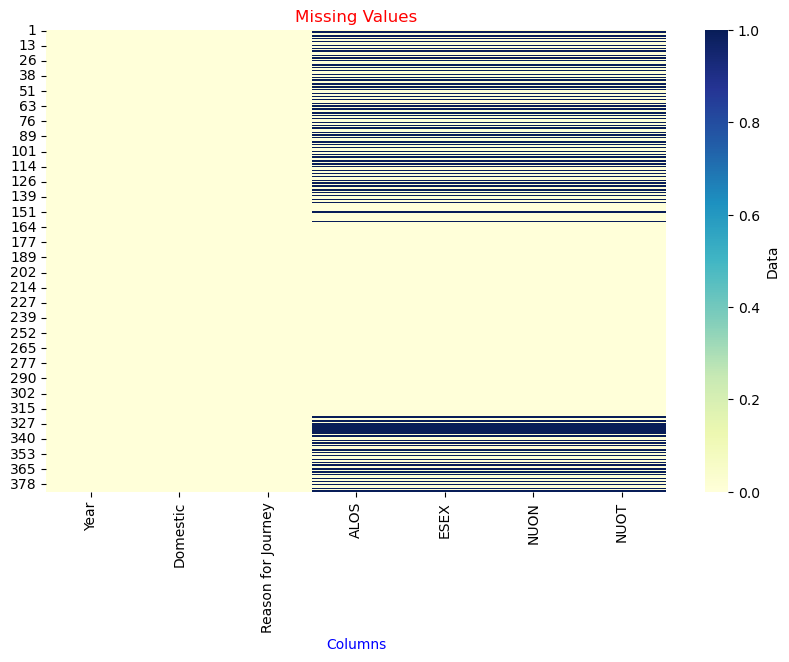

In [24]:
# missing values heatmap was plotted
plt.figure(figsize=(10,6))
sns.heatmap(df4_filtered.isnull(), cmap="YlGnBu",cbar_kws={'label' : 'Data'})
plt.title('Missing Values', color="red",loc="center")
plt.xlabel('Columns', color="blue")
plt.show()

In [25]:
# After checked to describe of columns , the value of standart deviation of "ALOS" has acceptable level.Therefore "mean" method has been used.
df4_filtered['ALOS']=df4_filtered['ALOS'].fillna(df4_filtered['ALOS'].mean())
# Other columns "ESEX", "NUON" and "NUOT" have large standart deviation. So, Mode or median mathod can be used.
df4_filtered['ESEX']=df4_filtered['ESEX'].fillna(df4_filtered['ESEX'].mode()[0])
df4_filtered['NUON']=df4_filtered['NUON'].fillna(df4_filtered['NUON'].mode()[0])
df4_filtered['NUOT']=df4_filtered['NUOT'].fillna(df4_filtered['NUOT'].mode()[0])

In [26]:
df4_filtered.isnull().sum(0) # After filling data methods, there is no missing data for every column.

Statistic Label
Year                  0
Domestic              0
Reason for Journey    0
ALOS                  0
ESEX                  0
NUON                  0
NUOT                  0
dtype: int64

In [27]:
df4_filtered.head() # Last version of dataset after filling datas

Statistic Label  Year  Domestic      Reason for Journey      ALOS   ESEX  \
1                2000  Domestic                Business  3.000000  109.5   
2                2000  Domestic  Education and training  5.360317  123.4   
3                2000  Domestic                 Holiday  4.600000  447.7   
4                2000  Domestic           Other reasons  3.200000   68.1   
5                2000  Domestic         Sporting events  5.360317  123.4   

Statistic Label     NUON    NUOT  
1                 1672.0   554.0  
2                  672.0   113.0  
3                11465.0  2516.0  
4                 1916.0   607.0  
5                  672.0   113.0

In [28]:
df4_filtered.describe() # As we see , Standart daviation of columns have been reduced.

Statistic Label        Year        ALOS         ESEX          NUON  \
count             336.00000  336.000000   336.000000    336.000000   
mean             2011.50000    5.360317   549.744643   5581.580357   
std                 6.93251    3.004694  1052.480286   9321.830434   
min              2000.00000    1.500000    16.900000    220.000000   
25%              2005.75000    3.100000   123.400000    672.000000   
50%              2011.50000    5.360317   132.050000   1550.500000   
75%              2017.25000    6.600000   556.250000   6154.500000   
max              2023.00000   19.400000  8561.000000  47660.000000   

Statistic Label         NUOT  
count             336.000000  
mean             1098.892857  
std              1519.876189  
min                62.000000  
25%               113.000000  
50%               350.500000  
75%              1459.250000  
max              7271.000000

### Detecting of Outliers and Replace of them with some method

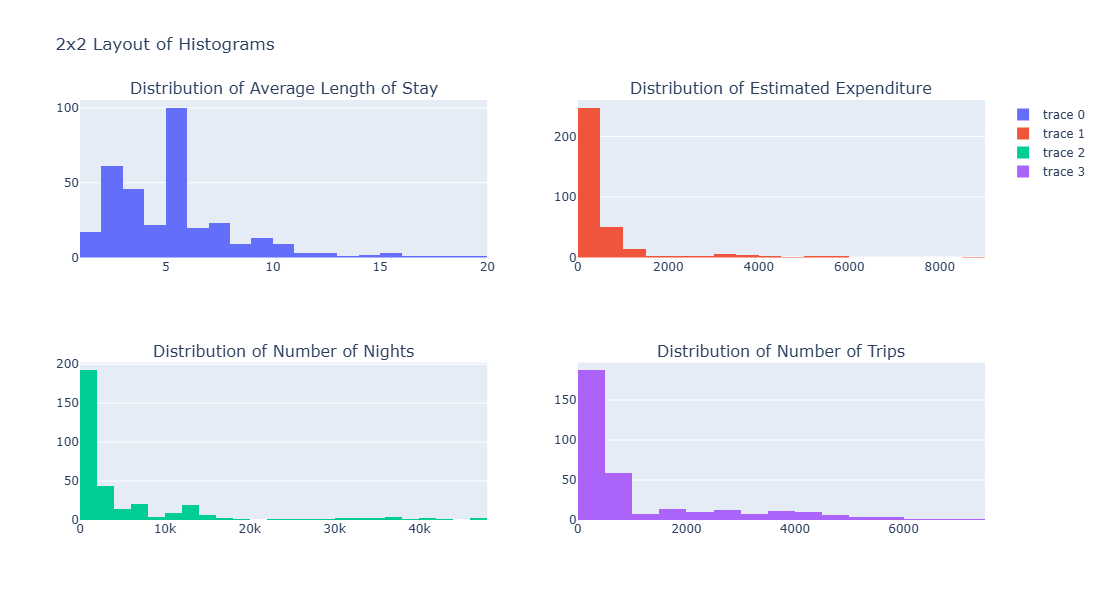

In [30]:
# import px.histogram libraries to plot to review the distrubitions.
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create subplots: 2 rows, 2 columns
fig = make_subplots(rows=2, cols=2, subplot_titles=("Distribution of Average Length of Stay", "Distribution of Estimated Expenditure", 
                                                    "Distribution of Number of Nights", "Distribution of Number of Trips"))
# Add histograms to the subplots for each column
fig.add_trace(go.Histogram(x=df4_filtered['ALOS']), row=1, col=1)
fig.add_trace(go.Histogram(x=df4_filtered['ESEX']), row=1, col=2)
fig.add_trace(go.Histogram(x=df4_filtered['NUON']), row=2, col=1)
fig.add_trace(go.Histogram(x=df4_filtered['NUOT']), row=2, col=2)

fig.update_layout(height=600, width=1000,title_text="2x2 Layout of Histograms") # Layout name
fig.show()

- 1 Average Length of Stay (ALOS) : The distribution appears slightly right-skewed and average lengt of stay between 2-5 nights.
- 2 Estimated Expenditure (ESEX) :  The distribution shows the values right-skewed and most of datas concentrated around 100-200 euro million.
- 3 Number of Nights (NUON) : The distribution shows a concentration of trips in the lower range with right-skewed, while some values are extremly high such as 3500.
- 4 Number of Trips (NUOT) : The distribution is also right skewed with a low concentration (0-200) 




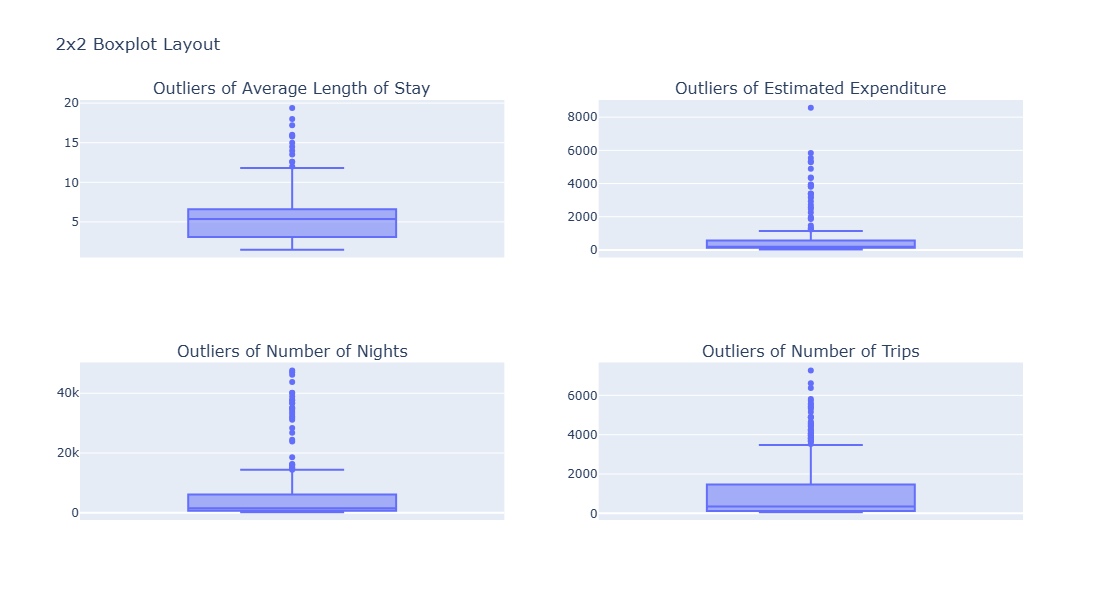

In [32]:
# Create subplots: 2 rows, 2 columns
fig = make_subplots(rows=2, cols=2, subplot_titles=("Outliers of Average Length of Stay", "Outliers of Estimated Expenditure", 
                                                    "Outliers of Number of Nights", "Outliers of Number of Trips"))
# Add boxplots to the subplots for each column
fig.add_trace(px.box(df4_filtered, y="ALOS").data[0], row=1, col=1)
fig.add_trace(px.box(df4_filtered, y="ESEX").data[0], row=1, col=2)
fig.add_trace(px.box(df4_filtered, y="NUON").data[0], row=2, col=1)
fig.add_trace(px.box(df4_filtered, y="NUOT").data[0], row=2, col=2)

fig.update_layout(height=600, width=1000,title_text="2x2 Boxplot Layout") # Layout name
fig.show()

- As we see , There are outliers data for all column.

In [34]:
# a function was created to find outliers using IQR method
# if any data lower than q1 - 1.5*iqr or higher than q3 + 1.5*iqr , this function will detect them.

def find_outliers_IQR(df4_filtered):
    q1 = df4_filtered.quantile(0.25)
    q3 = df4_filtered.quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR
    outliers = df4_filtered[(df4_filtered < lower_bound) | (df4_filtered > upper_bound)]
    return outliers


In [35]:
#every columns were checked
print("ALOS")
outliers = find_outliers_IQR(df4_filtered["ALOS"])
print("number of outliers: " + str(len(outliers)))
print("max outlier value: " + str(outliers.max()))
print("min outlier value: " + str(outliers.min()))

print("ESEX")
outliers = find_outliers_IQR(df4_filtered["ESEX"])
print("number of outliers: " + str(len(outliers)))
print("max outlier value: " + str(outliers.max()))
print("min outlier value: " + str(outliers.min()))

print("NUON")
outliers = find_outliers_IQR(df4_filtered["NUON"])
print("number of outliers: " + str(len(outliers)))
print("max outlier value: " + str(outliers.max()))
print("min outlier value: " + str(outliers.min()))

print("NUOT")
outliers = find_outliers_IQR(df4_filtered["NUOT"])
print("number of outliers: " + str(len(outliers)))
print("max outlier value: " + str(outliers.max()))
print("min outlier value: " + str(outliers.min()))

ALOS
number of outliers: 13
max outlier value: 19.4
min outlier value: 12.0
ESEX
number of outliers: 29
max outlier value: 8561.0
min outlier value: 1232.6
NUON
number of outliers: 32
max outlier value: 47660.0
min outlier value: 14424.0
NUOT
number of outliers: 38
max outlier value: 7271.0
min outlier value: 3530.0


In [36]:
# a function was written to find outliers and impute of them with mean method.
# Data which lower than q1 - 1.5*iqr or higher than q3 + 1.5*iqr will be adjustment with mean() function.
 
def imputation_outliers_IQR(df4_filtered):
   Q1=df4_filtered.quantile(0.25)
   Q3=df4_filtered.quantile(0.75)
   IQR=Q3-Q1
   upper = Q3+1.5*IQR #df4_filtered[~(df4_filtered>(Q3+1.5*IQR))].max()
   lower = Q1-1.5*IQR #df4_filtered[~(df4_filtered<(Q1-1.5*IQR))].min()
   df4_filtered = np.where((df4_filtered > upper) | (df4_filtered < lower),df4_filtered.mean(),df4_filtered)
   return df4_filtered

In [37]:
# Called "imputation_outliers_IQR" function for each column
df4_filtered['ALOS'] = imputation_outliers_IQR(df4_filtered['ALOS'])
df4_filtered['ESEX'] = imputation_outliers_IQR(df4_filtered['ESEX'])
df4_filtered['NUON'] = imputation_outliers_IQR(df4_filtered['NUON'])
df4_filtered['NUOT'] = imputation_outliers_IQR(df4_filtered['NUOT'])

In [38]:
df4_filtered.describe()

Statistic Label        Year        ALOS         ESEX          NUON  \
count             336.00000  336.000000   336.000000    336.000000   
mean             2011.50000    4.982889   298.939865   3241.724915   
std                 6.93251    2.239393   290.771713   3620.591918   
min              2000.00000    1.500000    16.900000    220.000000   
25%              2005.75000    3.100000   123.400000    672.000000   
50%              2011.50000    5.360317   132.050000   1550.500000   
75%              2017.25000    5.500000   549.711161   5581.580357   
max              2023.00000   11.800000  1135.800000  14374.000000   

Statistic Label         NUOT  
count             336.000000  
mean              696.996811  
std               790.668706  
min                62.000000  
25%               113.000000  
50%               350.500000  
75%              1098.892857  
max              3472.000000

### Comparing of some Numerical and Categorical Features with Statistical Columns.

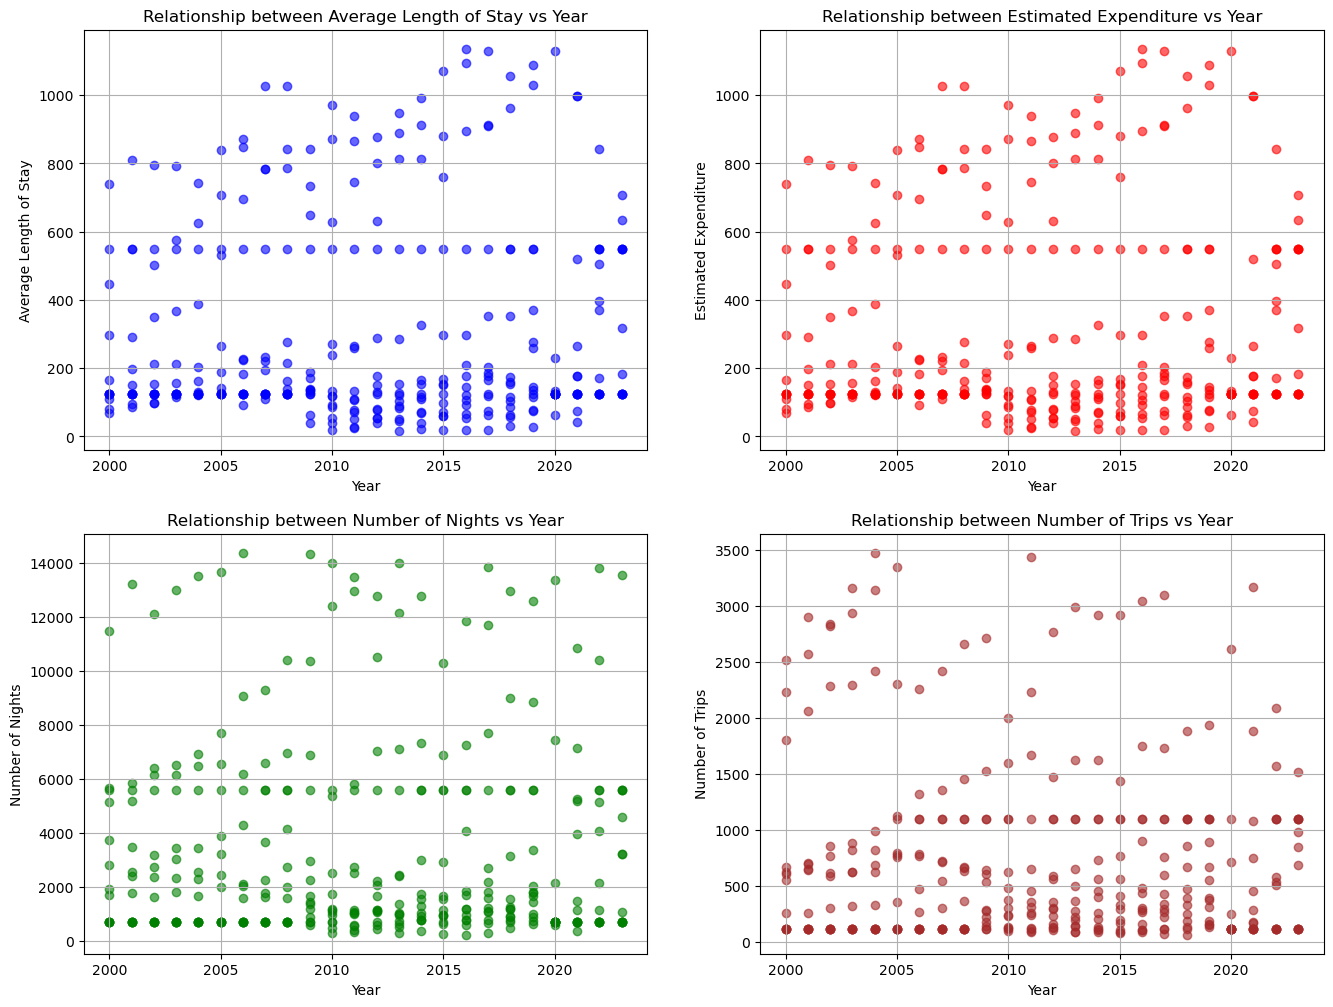

In [40]:
# Set up the figure for scatter plots against Year
plt.figure(figsize=(16, 12))

# Scatter plot for relationship between Average Length of Stay vs Year
plt.subplot(2, 2, 1)
plt.scatter(df4_filtered['Year'], df4_filtered['ESEX'], alpha=0.6, color='blue')
plt.title('Relationship between Average Length of Stay vs Year')
plt.xlabel('Year')
plt.ylabel('Average Length of Stay')
plt.grid(True)

# Scatter plot for relationship between Estimated Expenditure vs Year
plt.subplot(2, 2, 2)
plt.scatter(df4_filtered['Year'], df4_filtered['ESEX'], alpha=0.6, color='red')
plt.title('Relationship between Estimated Expenditure vs Year')
plt.xlabel('Year')
plt.ylabel('Estimated Expenditure')
plt.grid(True)

# Scatter plot for relationship between Number of Nights vs Year
plt.subplot(2, 2, 3)
plt.scatter(df4_filtered['Year'], df4_filtered['NUON'], alpha=0.6, color='green')
plt.title('Relationship between Number of Nights vs Year')
plt.xlabel('Year')
plt.ylabel('Number of Nights')
plt.grid(True)

# Scatter plot for relationship between Number of Trips vs Year
plt.subplot(2, 2, 4)
plt.scatter(df4_filtered['Year'], df4_filtered['NUOT'], alpha=0.6, color='brown')
plt.title('Relationship between Number of Trips vs Year')
plt.xlabel('Year')
plt.ylabel('Number of Trips')
plt.grid(True)

- 1 Average Length of Stay (ALOS) : There is an increase in the average length of stay over the years.
- 2 Estimated Expenditure (ESEX) : There is an increase in estimated expenditure over the years. It might be about increasing travel costs.
- 3 Number of Nights (NUON) : There is generally fluctuations in number of nights over the years.it may be indicate the travel habits ara changing.
- 4 Number of Trips (NUOT) : There is a clear upward trend in number of trips over the years.

In [42]:
columns = ['ALOS','ESEX','NUON','NUOT'] # Create an array
# Calculate average values of numerical columns grouped by Reason for Journey
reason_for_journey = df4_filtered.groupby('Reason for Journey')[columns].mean()
print(reason_for_journey)

Statistic Label                 ALOS        ESEX         NUON         NUOT
Reason for Journey                                                        
Business                    3.430423  442.657180  2084.791667   589.083333
Education and training      6.181448  102.275000   853.000000   121.687500
Holiday                     6.032507  681.411682  7880.666481  1582.822173
Other reasons               5.065013  184.233333  2088.041667   493.270833
Sporting events             4.220172  117.316667   746.875000   197.104167
Visiting friends/relatives  4.834590  461.385193  8232.053757  1783.988839
Work/looking for work       5.116071  103.300000   806.645833   111.020833


- According the information above :
   - Education and training trips have the highest average length of stay(average = 6.18).It shows Education and training trips require a long stay.
   - Holiday trips have the highest average estimated expenditure(681).It show Holiday trips have the potential to spend more money.
   - Visiting friends/relatives have highest average number of nights(8232).It might be 
   - Visiting friends/relatives have also highest average number of trips(1783).

In [44]:
# Calculate average values of numerical columns grouped by Domestic
domestic = df4_filtered.groupby('Domestic')[columns].mean()
print(domestic)

Statistic Label      ALOS        ESEX        NUON        NUOT
Domestic                                                     
Domestic         3.526861  228.867134  3204.42990  791.808036
Outbound         6.438917  369.012596  3279.01993  602.185587


- According the information above :
  - While, Domestic travel has only highest value in number of trips whereas Outbound travel has highest values in other category.It may be about distance.For domestic travel,It is easy to travel short distance.We can say outbound travel require long stay.Therefore, has big potantial to spending money.


# Descriptive Statistics

In [47]:
numerical_features = df4_filtered.select_dtypes(include=[np.number])
categorical_features = df4_filtered.select_dtypes(exclude=[np.number])

print(f'Numerical Feautures : {len(numerical_features.columns)}')
print(f'Categorical Feautures : {len(categorical_features.columns)}')

Numerical Feautures : 5
Categorical Feautures : 2


In [48]:
df5_filtered = pd.DataFrame(df4_filtered)
df5_filtered = df5_filtered.drop(columns=['Domestic','Reason for Journey'])

In [49]:
df5_filtered.head()

Statistic Label  Year      ALOS   ESEX     NUON    NUOT
1                2000  3.000000  109.5   1672.0   554.0
2                2000  5.360317  123.4    672.0   113.0
3                2000  4.600000  447.7  11465.0  2516.0
4                2000  3.200000   68.1   1916.0   607.0
5                2000  5.360317  123.4    672.0   113.0

### Measures of Central Tendency

In [51]:
df5_filtered.mean()     # Check the mean of each column

Statistic Label
Year    2011.500000
ALOS       4.982889
ESEX     298.939865
NUON    3241.724915
NUOT     696.996811
dtype: float64

In [52]:
df5_filtered.median()   # Check the median of each column

Statistic Label
Year    2011.500000
ALOS       5.360317
ESEX     132.050000
NUON    1550.500000
NUOT     350.500000
dtype: float64

In [53]:
df5_filtered.mode()

Statistic Label  Year      ALOS   ESEX   NUON   NUOT
0                2000  5.360317  123.4  672.0  113.0
1                2001       NaN    NaN    NaN    NaN
2                2002       NaN    NaN    NaN    NaN
3                2003       NaN    NaN    NaN    NaN
4                2004       NaN    NaN    NaN    NaN
5                2005       NaN    NaN    NaN    NaN
6                2006       NaN    NaN    NaN    NaN
7                2007       NaN    NaN    NaN    NaN
8                2008       NaN    NaN    NaN    NaN
9                2009       NaN    NaN    NaN    NaN
10               2010       NaN    NaN    NaN    NaN
11               2011       NaN    NaN    NaN    NaN
12               2012       NaN    NaN    NaN    NaN
13               2013       NaN    NaN    NaN    NaN
14               2014       NaN    NaN    NaN    NaN
15               2015       NaN    NaN    NaN    NaN
16               2016       NaN    NaN    NaN    NaN
17               2017       NaN    NaN    NaN    NaN
18               2018       NaN    NaN    NaN    NaN
19               2019       NaN    NaN    NaN    NaN
20               2020       NaN    NaN    NaN    NaN
21               2021       NaN    NaN    NaN    NaN
22               2022       NaN    NaN    NaN    NaN
23               2023       NaN    NaN    NaN    NaN

ALOS - Mean: 4.982889266817838, Median: 5.360317460317461, Mode: 5.360317460317461
ESEX - Mean: 298.93986500850343, Median: 132.05, Mode: 123.4
NUON - Mean: 3241.724914965986, Median: 1550.5, Mode: 672.0
NUOT - Mean: 696.9968112244899, Median: 350.5, Mode: 113.0


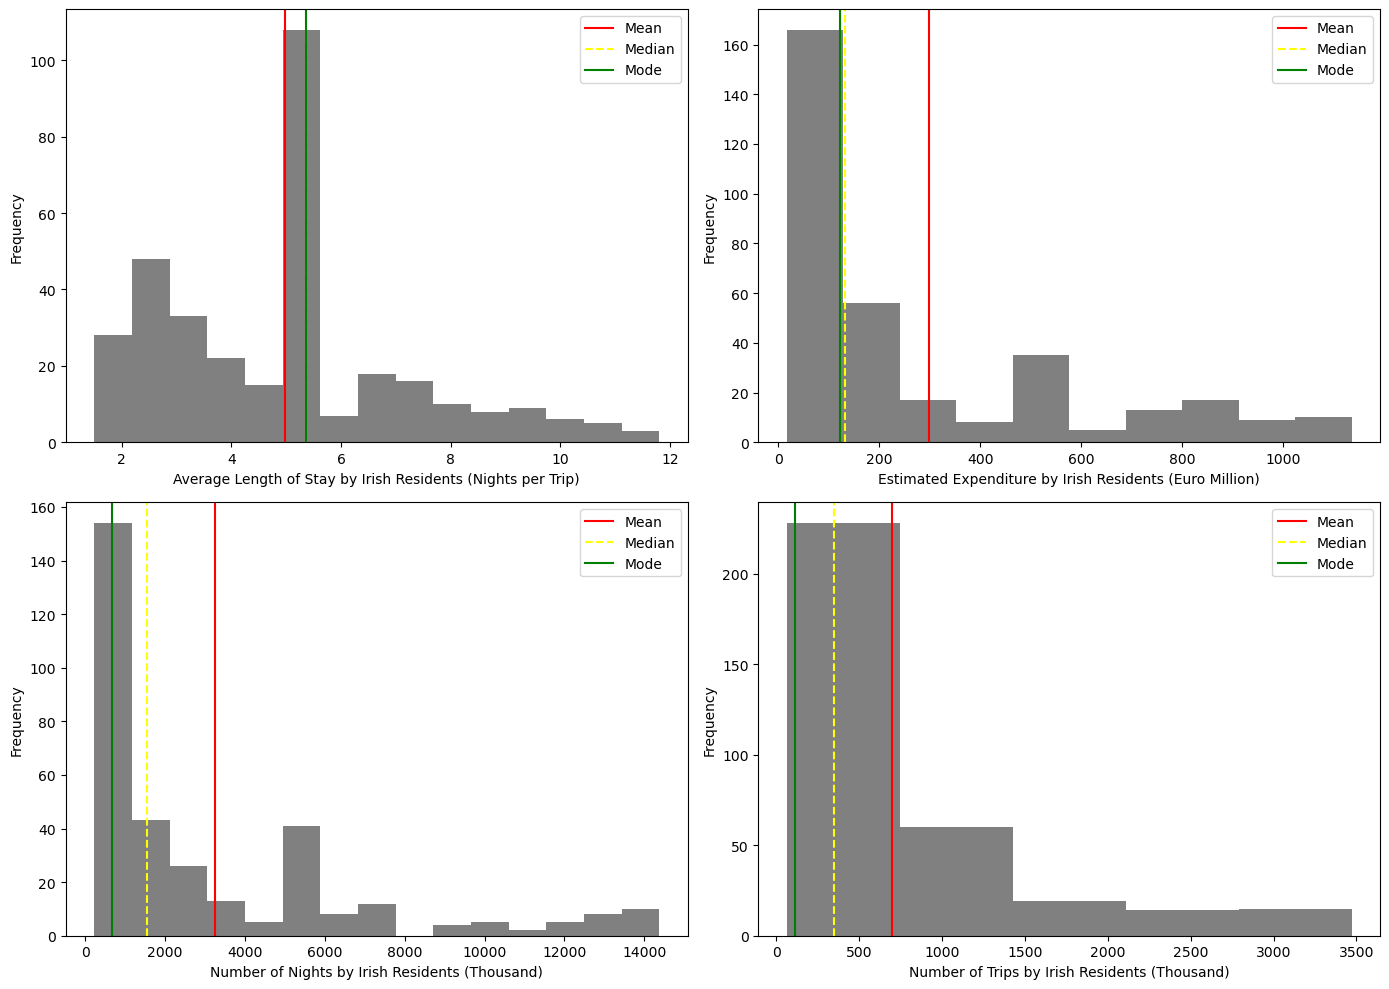

In [54]:
# Create lists for column names, labels, and bin sizes

columns_name = ["ALOS","ESEX","NUON","NUOT"]
x_labels = [
            "Average Length of Stay by Irish Residents (Nights per Trip)",
           "Estimated Expenditure by Irish Residents (Euro Million)",
           "Number of Nights by Irish Residents (Thousand)",
           "Number of Trips by Irish Residents (Thousand)"
]
bins = [15,10,15,5]

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2,2, figsize=(14,10))  

# Loop through each subplot, accessing the corresponding settings
for i , ax in enumerate(axs.flat):
    data = df5_filtered[columns_name[i]]
    mean = data.mean()
    median = data.median()
    mode = data.mode()[0]
    
    # Print Mean, Median, Mode
    print(f"{columns_name [i]} - Mean: {mean}, Median: {median}, Mode: {mode}")

    # Plot each histogram
    ax.hist(data, bins=bins[i], color='grey')
    ax.axvline(mean, color='red', label='Mean')
    ax.axvline(median, color='yellow', linestyle='--', label='Median')
    ax.axvline(mode, color='green', label='Mode')
    ax.set_xlabel(x_labels[i])
    ax.set_ylabel('Frequency')
    ax.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### Measure of Dispersion

In [56]:
df5_filtered.min()   # Min value of Features

Statistic Label
Year    2000.0
ALOS       1.5
ESEX      16.9
NUON     220.0
NUOT      62.0
dtype: float64

In [57]:
df5_filtered.max() # Max value of Features

Statistic Label
Year     2023.0
ALOS       11.8
ESEX     1135.8
NUON    14374.0
NUOT     3472.0
dtype: float64

In [58]:
df5_filtered.max() - df5_filtered.min() # Range value of Features

Statistic Label
Year       23.0
ALOS       10.3
ESEX     1118.9
NUON    14154.0
NUOT     3410.0
dtype: float64

In [59]:
df5_filtered.var()     # Variance value of Features

Statistic Label
Year    4.805970e+01
ALOS    5.014881e+00
ESEX    8.454819e+04
NUON    1.310869e+07
NUOT    6.251570e+05
dtype: float64

In [60]:
df5_filtered.std()     # Standart Deviation of value of Features

Statistic Label
Year       6.932510
ALOS       2.239393
ESEX     290.771713
NUON    3620.591918
NUOT     790.668706
dtype: float64

In [61]:
print(" %25 of quantile:",df5_filtered.quantile(0.25), " \n %50 of quantile:",df5_filtered.quantile(0.5), 
      " \n %75 of quantile:",df5_filtered.quantile(0.75), "\n Range of Interquartile:",df5_filtered.quantile(0.75)-df5_filtered.quantile(0.25))


 %25 of quantile: Statistic Label
Year    2005.75
ALOS       3.10
ESEX     123.40
NUON     672.00
NUOT     113.00
Name: 0.25, dtype: float64  
 %50 of quantile: Statistic Label
Year    2011.500000
ALOS       5.360317
ESEX     132.050000
NUON    1550.500000
NUOT     350.500000
Name: 0.5, dtype: float64  
 %75 of quantile: Statistic Label
Year    2017.250000
ALOS       5.500000
ESEX     549.711161
NUON    5581.580357
NUOT    1098.892857
Name: 0.75, dtype: float64 
 Range of Interquartile: Statistic Label
Year      11.500000
ALOS       2.400000
ESEX     426.311161
NUON    4909.580357
NUOT     985.892857
dtype: float64


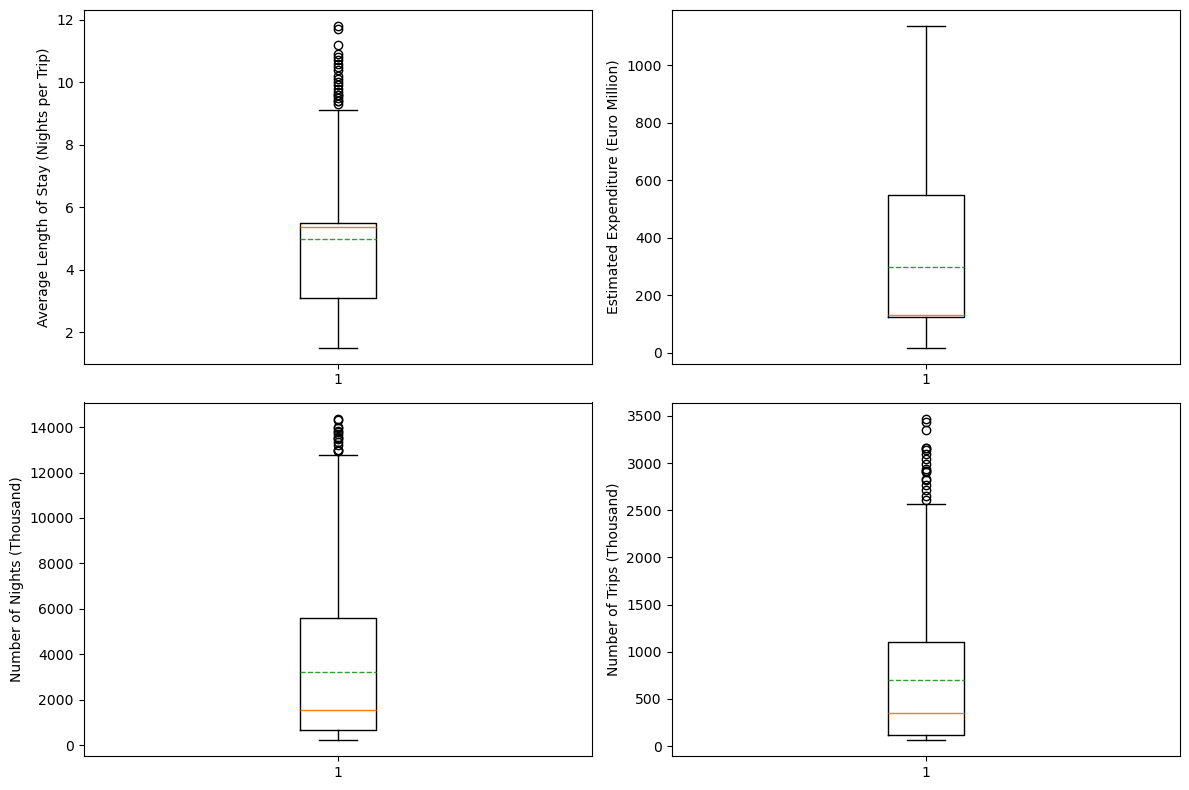

In [62]:
# Create lists for column names and labels
columns_name = ["ALOS", "ESEX", "NUON", "NUOT"]
y_labels = [
    "Average Length of Stay (Nights per Trip)",
    "Estimated Expenditure (Euro Million)",
    "Number of Nights (Thousand)",
    "Number of Trips (Thousand)"
]

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Loop through each subplot, accessing the corresponding settings
for i, ax in enumerate(axs.flat):
    data = df5_filtered[columns_name[i]]
    
    # Plotting the boxplot with mean line
    ax.boxplot(data, showmeans=True, meanline=True)
    ax.set_ylabel(y_labels[i])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### Measure to Describe Shape of Distribution

In [64]:
df5_filtered.skew() # Skewness of Features

Statistic Label
Year    0.000000
ALOS    0.690647
ESEX    1.313855
NUON    1.589830
NUOT    1.710030
dtype: float64

In [65]:
df5_filtered.kurt() # Kurtosis of Features

Statistic Label
Year   -1.204215
ALOS    0.161153
ESEX    0.463566
NUON    1.680648
NUOT    2.316293
dtype: float64

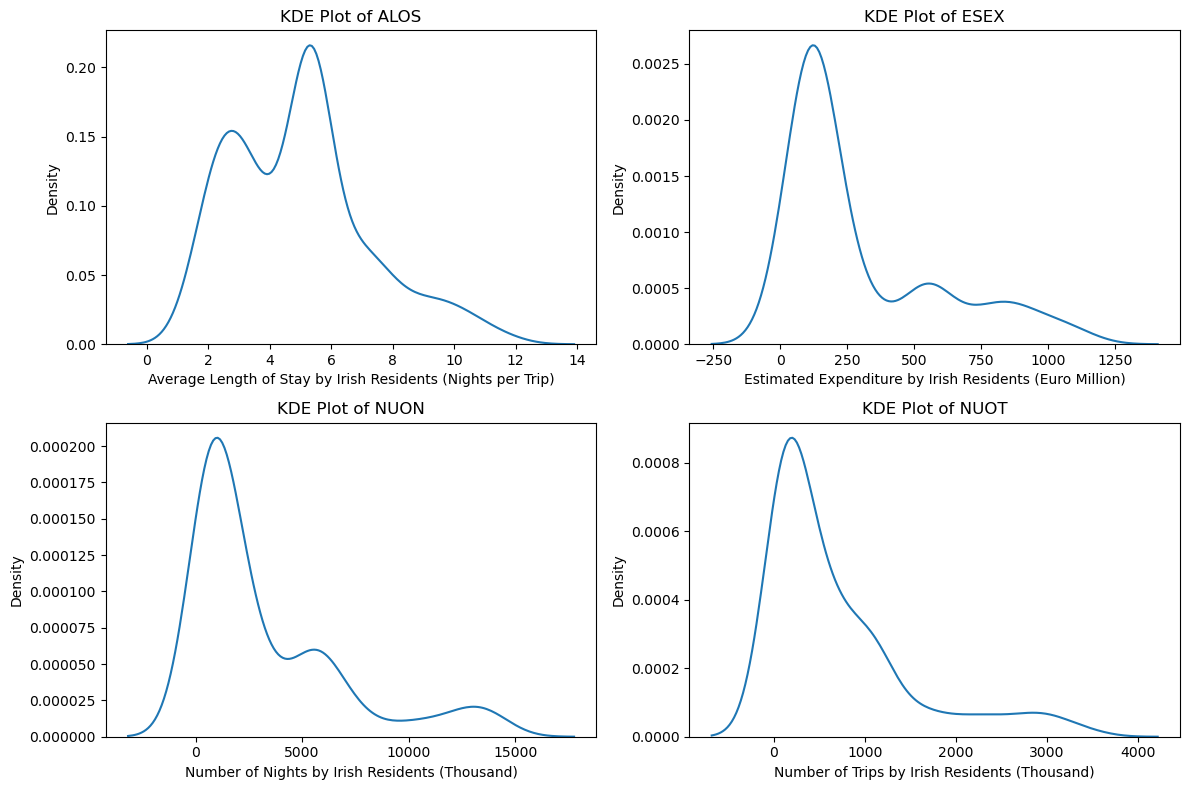

In [66]:
# Create lists for column names and labels
columns_name = ["ALOS", "ESEX", "NUON", "NUOT"]
X_labels = [
    "Average Length of Stay (Nights per Trip)",
    "Estimated Expenditure (Euro Million)",
    "Number of Nights (Thousand)",
    "Number of Trips (Thousand)"
]

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, ax in enumerate(axs.flat):
    sns.kdeplot(df5_filtered[columns_name[i]], ax=ax)
    ax.set_xlabel(x_labels[i])
    ax.set_title(f"KDE Plot of {columns_name[i]}")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


- ALOS : skewness > 0 (right-skewed) and kurtosis < 3 (platykurtic)
- ESEX : skewness > 0 (right-skewed) and kurtosis < 3 (platykurtic)
- NUON : skewness > 0 (right-skewed) and kurtosis < 3 (platykurtic)
- NUOT : skewness > 0 (right-skewed) and kurtosis < 3 (platykurtic)

Statistic Label      ALOS      ESEX      NUON      NUOT
Statistic Label                                        
ALOS             1.000000  0.144657  0.080829 -0.048384
ESEX             0.144657  1.000000  0.746585  0.500379
NUON             0.080829  0.746585  1.000000  0.758272
NUOT            -0.048384  0.500379  0.758272  1.000000


<Axes: xlabel='Statistic Label', ylabel='Statistic Label'>

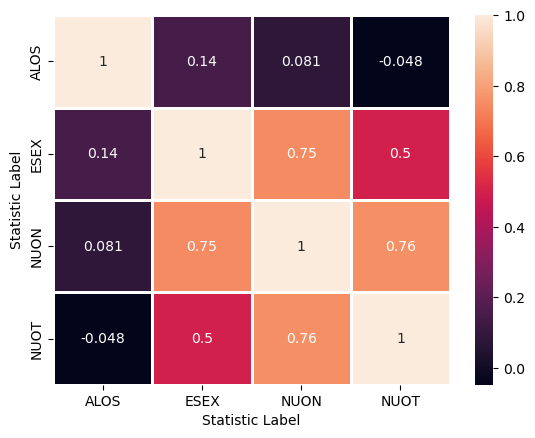

In [68]:
coralation = df5_filtered[['ALOS','ESEX','NUON','NUOT']].corr() # Checked relationship betwwen two variables
print(coralation)
sns.heatmap(coralation,annot=True,lw=1)

- Acording to correlation matrix, There is around %74 percent relationship between "Estimated Expenditure by Irish Residents" and "Number of Nights by Irish Residents". Also there is about %75 percent relationship between "Number of Nights by Irish Residents" and "Number of Trips by Irish Residents"

### Binomial Distribution

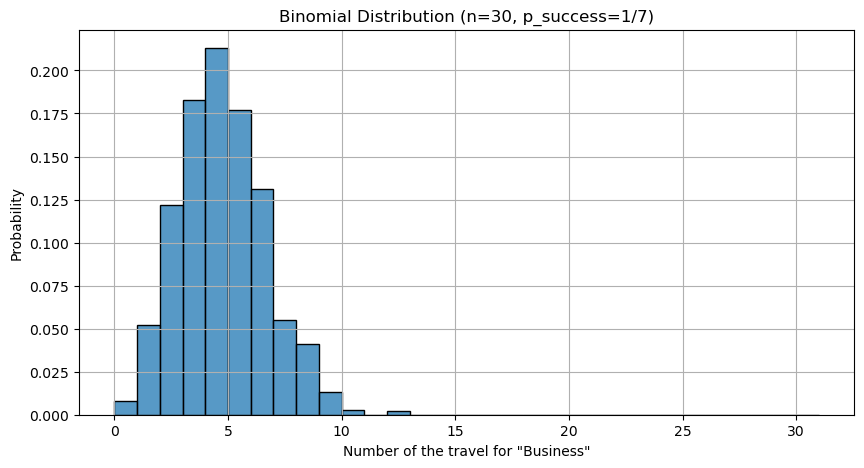

In [71]:
n_trials = 30     # Number of Tourist
p_success = 1/7   # The possibility of reason of travel
size = 1000       # Number of experiements
data_binom = np.random.binomial(n_trials, p_success, size) # Generate Binomial distribution 

plt.figure(figsize=(10, 5))
sns.histplot(data_binom, bins=range(n_trials + 2), kde=False, stat='probability')
plt.title('Binomial Distribution (n=30, p_success=1/7)')
plt.xlabel('Number of the travel for "Business"')
plt.ylabel('Probability')
plt.grid()
plt.show()

- We calculated that how many tourists travel in order to "Business" among 30 tourists in 1000 experiements.In our dataset,there are seven different travel reasons. "Business", "Education and training", "Holiday", " Other reasons", "Sporting events", "Visiting friends/relatives" and "Work/looking for work". Therefore, the probability of ‘Business’ travel is equal to 1/7. 

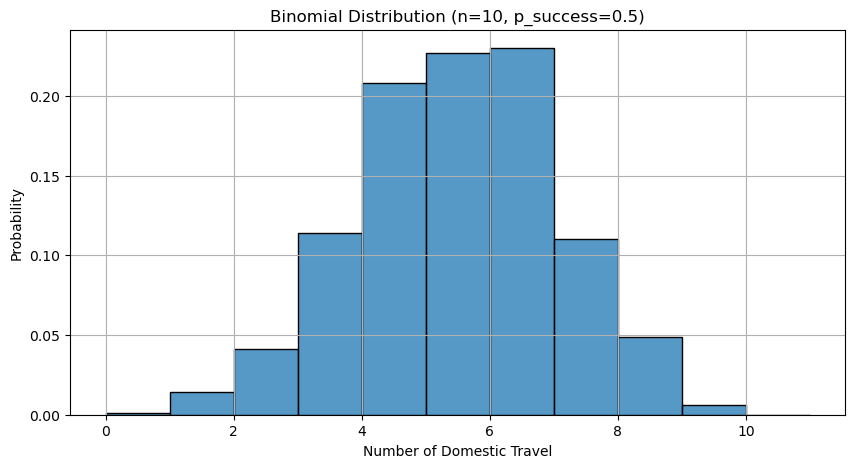

In [73]:
n_trials = 10     # Number of Tourist
p_success = 0.5   # The possibility of "domestic" travel
size = 1000       # Number of experiements
data_binom = np.random.binomial(n_trials, p_success, size) # Generate Binomial distribution 

plt.figure(figsize=(10, 5))
sns.histplot(data_binom, bins=range(n_trials + 2), kde=False, stat='probability')
plt.title('Binomial Distribution (n=10, p_success=0.5)')
plt.xlabel('Number of Domestic Travel')
plt.ylabel('Probability')
plt.grid()
plt.show()

- In this example , We calculated probability of domestic or outbound tourism among 10 tourists in 1000 experiements. In our dataset we have 2 posiblity. So, p_success = %50.

### Poisson Distribution

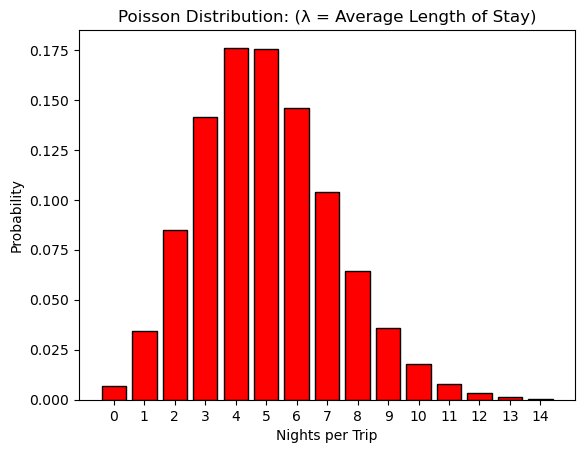

In [76]:
lambda_stay = df5_filtered["ALOS"].mean()  # Average Length of Stay
k_stay = np.arange(0, 15)  # Number of possible stay (0 to 15)


poisson_pmf_stay = poisson.pmf(k_stay, lambda_stay) # Poisson probability mass function for calls

plt.bar(k_stay, poisson_pmf_stay, color='red', edgecolor='black')
plt.title('Poisson Distribution: (λ = Average Length of Stay)')
plt.xlabel('Nights per Trip')
plt.ylabel('Probability')
plt.xticks(k_stay)
plt.show()

- We calculated the probability of the average length of stay in a year for any reason. According to the graph, the highest probability of staying is approximately 0.175, with the highest number of stays being 4-5 days.

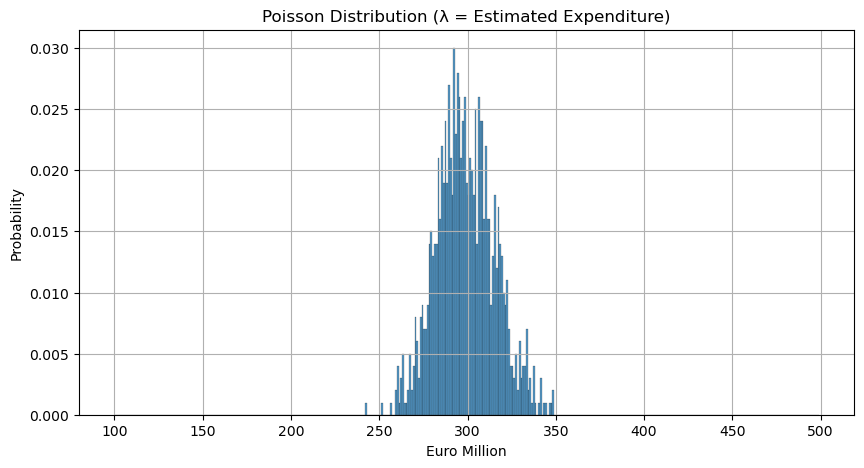

In [78]:
lambda_rate = df5_filtered["ESEX"].mean() # Avarage number of Estimated Expenditure

poisson_data = np.random.poisson(lambda_rate, 1000) # Generate Poisson distribution data

plt.figure(figsize=(10, 5))
sns.histplot(poisson_data, bins=range(100, 500), kde=False, stat='probability')
plt.title('Poisson Distribution (λ = Estimated Expenditure)')
plt.xlabel('Euro Million')
plt.ylabel('Probability')
plt.grid()
plt.show()


- In this example, we calculated the probability of average expenditure in a year for any travel reason. The expenditure of 300 million euros has the highest probability value, above 0.030.

### Normal Distribution

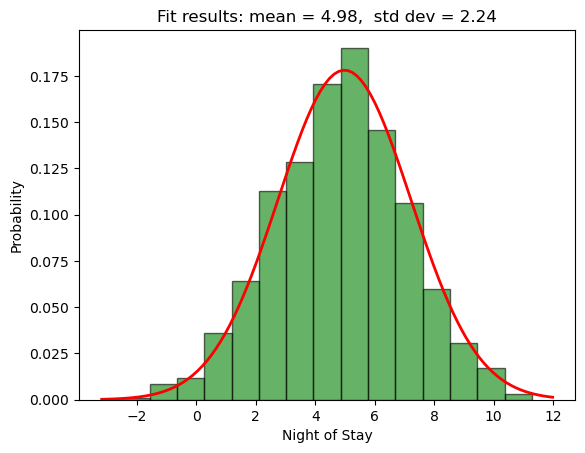

In [81]:
# Generate 1000 random numbers from a normal distribution with mean  and standart deviation 
mean_norm = df5_filtered["ALOS"].mean()   # Mean of the distribution
std_dev_norm = df5_filtered["ALOS"].std() #Standard deviation of the distribution
sample_size_norm = 1000   # Number of samples

normal_data = np.random.normal(mean_norm, std_dev_norm, sample_size_norm) ## Generate samples

plt.hist(normal_data, bins=15, density=True, alpha=0.6, color='green',edgecolor='black') # Plot histogram of the samples

x_min, x_max = plt.xlim() # Plot the probability density function (PDF)
x = np.linspace(x_min, x_max, 100)
p = norm.pdf(x, mean_norm, std_dev_norm)

plt.plot(x, p, 'red', linewidth=2)
plt.xlabel('Night of Stay')
plt.ylabel('Probability')
title = "Fit results: mean = %.2f,  std dev = %.2f" % (mean_norm, std_dev_norm)
plt.title(title)

plt.show()

- What is the percentage of nights with a stay of less than 8?

In [83]:
mu=4.98
sigma=2.24

#Find the z-score
z = (8-mu)/sigma

#Find the probability (area under the curve until 183 cm)
p = norm.cdf(z)

print('Percentage of night of stay less than 8 days:', round(p*100,2))

Percentage of night of stay less than 8 days: 91.12


- What is the percentage of nights with a stay of more than 4?

In [85]:
mu=4.98
sigma=2.24

#Find the z-score
z = (4-mu)/sigma

#Find the probability (area under the curve until 183 cm)
p = 1-norm.cdf(z)

print('Percentage of night of stay more than 4 days:', round(p*100,2))

Percentage of night of stay more than 4 days: 66.91


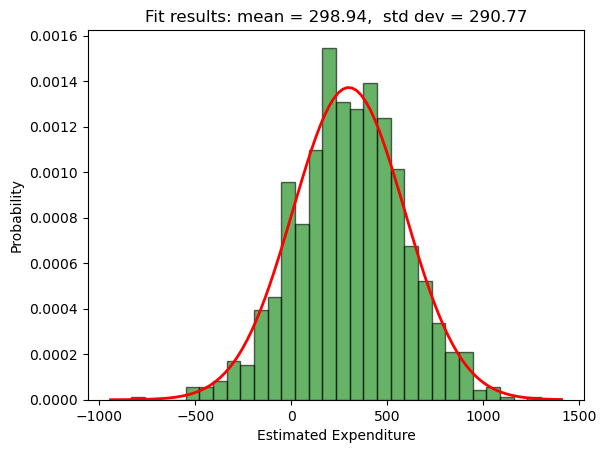

In [86]:
# Generate 1000 random numbers from a normal distribution with mean  and standart deviation 
mean_norm = df5_filtered["ESEX"].mean()   # Mean of the distribution
std_dev_norm = df5_filtered["ESEX"].std() #Standard deviation of the distribution
sample_size_norm = 1000   # Number of samples

normal_data = np.random.normal(mean_norm, std_dev_norm, sample_size_norm) ## Generate samples

plt.hist(normal_data, bins=30, density=True, alpha=0.6, color='green',edgecolor='black') # Plot histogram of the samples

x_min, x_max = plt.xlim() # Plot the probability density function (PDF)
x = np.linspace(x_min, x_max, 100)
p = norm.pdf(x, mean_norm, std_dev_norm)

plt.plot(x, p, 'red', linewidth=2)
plt.xlabel('Estimated Expenditure')
plt.ylabel('Probability')
title = "Fit results: mean = %.2f,  std dev = %.2f" % (mean_norm, std_dev_norm)
plt.title(title)

plt.show()

- What is the percentage of estimated expenditure less than 1000 euro million?

In [88]:
mu = 298.94
sigma = 290.77

#Find the z-score
z = (1000-mu)/sigma

#Find the probability (area under the curve until 183 cm)
p = norm.cdf(z)

print('Percentage of estimated expenditure less than 1000 euro million:', round(p*100,2))

Percentage of estimated expenditure less than 1000 euro million: 99.2


- What is the percentage of estimated expenditure more than 200 euro million?

In [90]:
mu = 298.94
sigma = 290.77

#Find the z-score
z = (200-mu)/sigma

#Find the probability (area under the curve until 183 cm)
p = 1-norm.cdf(z)

print('Percentage of estimated expenditure more than 200 euro million:', round(p*100,2))

Percentage of estimated expenditure more than 200 euro million: 63.32


# Machine Learning

# Lineer Regression

In [93]:
df6_filtered = pd.DataFrame(df4_filtered)


In [94]:
df6_filtered.head()

Statistic Label  Year  Domestic      Reason for Journey      ALOS   ESEX  \
1                2000  Domestic                Business  3.000000  109.5   
2                2000  Domestic  Education and training  5.360317  123.4   
3                2000  Domestic                 Holiday  4.600000  447.7   
4                2000  Domestic           Other reasons  3.200000   68.1   
5                2000  Domestic         Sporting events  5.360317  123.4   

Statistic Label     NUON    NUOT  
1                 1672.0   554.0  
2                  672.0   113.0  
3                11465.0  2516.0  
4                 1916.0   607.0  
5                  672.0   113.0

In [95]:
#df6_filtered.corr()
#sns.heatmap(df6_filtered.corr(),annot=True,lw=1)

In [96]:
RFJ = pd.get_dummies(df6_filtered[['Reason for Journey']],dtype=int) #function converts categorical variables into 
                                                                     #dummy/indicator variables.


In [97]:
X = pd.concat([df6_filtered[['ESEX', 'NUOT']], RFJ], axis=1) # Independent variables
y = df6_filtered['NUON']                                 # Dependent variables ( Target Value )

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Data splitted into train and test sets
                                                                                           # %80 train set and %20 test set

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(268, 9) (68, 9) (268,) (68,)


In [99]:
linear_model = LinearRegression() 
linear_model.fit(X_train,y_train)



LinearRegression()

In [100]:
linear_pred = linear_model.predict(X_test)
linear_pred

array([ 9451.28707062,  9851.13969854,   710.49876807,  2235.5460646 ,
        1831.75073003,   362.38127187,  8373.50924179,  1985.42673505,
         992.56512088,  -273.09087738,   513.155784  ,   710.49876807,
        7574.41758626,   992.56512088,  2155.60151559, 10690.36811928,
         385.39899013,   728.06752643,  1697.07217274,  1985.09457844,
        2071.4843943 ,   932.02521251,  6826.60327136,   710.49876807,
         992.56512088,  6044.71206844,   932.02521251,  6626.52651649,
        1981.99149235,   992.56512088,   710.49876807,   110.87970871,
         710.49876807,  1508.94261972,   402.9791935 ,  1659.57841044,
         974.92955808,   660.94932324,   932.02521251,  4265.62583586,
        3886.7677038 ,  6547.918384  ,  -288.23879253,  -100.56683657,
         932.02521251,   397.27689901,  9274.3153678 ,  4565.6382348 ,
       10044.9606926 ,  2011.63891414,   710.49876807,   932.02521251,
         893.35679704,   559.39517625,  6626.52651649,   932.02521251,
      

In [101]:
# Display the Slope and Intercept values
print('Slope: %.3f' % linear_model.coef_[0])
print('Intercept: %.3f' % linear_model.intercept_)

Slope: 5.942
Intercept: 876.092


In [102]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#This measures the average squared difference between the predicted and actual values.
mse = mean_squared_error(y_test, linear_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, linear_pred)
print("Mean Absolute Error:", mae)

#This indicates how well the model explains the variability of the target variable.
r2 = r2_score(y_test, linear_pred)
print("R-squared:", r2)

Mean Squared Error: 1135212.476546967
Mean Absolute Error: 615.8264093526727
R-squared: 0.8897273603717734


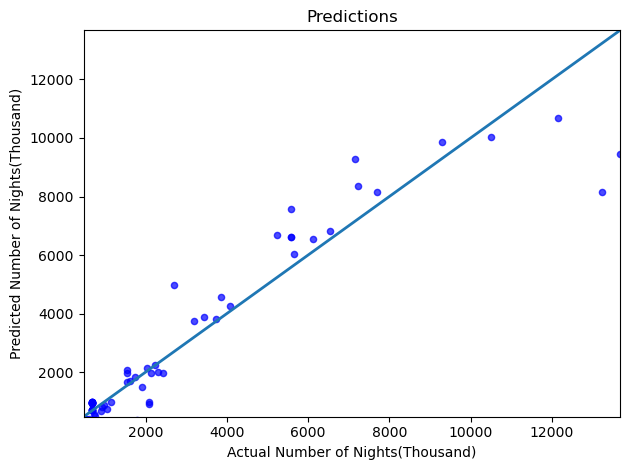

In [103]:
plt.scatter(y_test, linear_pred, alpha=0.7, color='blue', s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=2)  # Diagonal line
plt.title('Predictions')
plt.xlabel('Actual Number of Nights(Thousand)')
plt.ylabel('Predicted Number of Nights(Thousand)')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.tight_layout()
plt.show()



In [104]:
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

MSE train: 2317460.741, test: 1135212.477
R^2 train: 0.831, test: 0.890


- Hyperparameter Tuning in Linear Regression Using GridSearchCV


In [106]:
linear_model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [107]:
param_grid = {'copy_X': [True,False], 
               'fit_intercept': [True,False], 
               'n_jobs': [1,5,10,15,None], 
               'positive': [True,False]}

In [108]:
grid_search = GridSearchCV(linear_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [1, 5, 10, 15, None],
                         'positive': [True, False]})

In [109]:
# Parameter which gives the best results
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best Score: {grid_search.best_score_}")

Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}
Best Score: 0.8264552927702343


### Ridge Regression

In [111]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Initialize and train the Ridge Regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
ridge_model = Ridge(alpha = 10 ) # alpha = 10 has best result
ridge_model.fit(X_train, y_train)

# Predict and evaluate the model
ridge_pred = ridge_model.predict(X_test)

print('Ridge Regression - Mean Squared Error:', mean_squared_error(y_test, ridge_pred))
print('Ridge Regression - R^2 Score:', r2_score(y_test, ridge_pred))

# Display the score by using ridge object
print("Training set score: {:.2f}".format(ridge_model.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge_model.score(X_test, y_test)))


Ridge Regression - Mean Squared Error: 1109478.9053554619
Ridge Regression - R^2 Score: 0.8850192752844452
Training set score: 0.81
Test set score: 0.89


- Hyperparameter Tuning in Ridge Regression Using GridSearchCV


In [113]:
ridge_model.get_params()

{'alpha': 10,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [114]:
param_grid = {'alpha' : [0.001, 0.01, 1, 5, 10, 100]}

In [115]:
grid_search = GridSearchCV(ridge_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(alpha=10),
             param_grid={'alpha': [0.001, 0.01, 1, 5, 10, 100]})

In [116]:
# Parameter which gives the best results
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best Score: {grid_search.best_score_}")

Best Hyperparameters: {'alpha': 0.001}
Best Score: 0.8137809094837894


### Lasso Regression

In [118]:
from sklearn.linear_model import Lasso

# Initialize and train the Lasso Regression model
lasso_model = Lasso(alpha=1) 
lasso_model.fit(X_train, y_train)

# Predict and evaluate the model
lasso_pred = lasso_model.predict(X_test)
print('Lasso Regression - Mean Squared Error:', mean_squared_error(y_test, lasso_pred))
print('Lasso Regression - R^2 Score:', r2_score(y_test, lasso_pred))

print("Training set score: {:.2f}".format(lasso_model.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso_model.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso_model.coef_ != 0)))

Lasso Regression - Mean Squared Error: 1304571.6215548862
Lasso Regression - R^2 Score: 0.8648008630306774
Training set score: 0.83
Test set score: 0.86
Number of features used: 8


- Hyperparameter Tuning in Lasso Regression Using GridSearchCV


In [120]:
lasso_model.get_params()

{'alpha': 1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [121]:
param_grid = {'alpha' : [0.01, 0.1, 1.0, 10.0] }

In [122]:
grid_search = GridSearchCV(lasso_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(alpha=1),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0]})

In [123]:
# Parameter which gives the best results
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best Score: {grid_search.best_score_}")

Best Hyperparameters: {'alpha': 0.01}
Best Score: 0.8137802583755163


### Random Forest Regression

In [125]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Predict and evaluate the model
rf_pred = rf_model.predict(X_test)
print('Random Forest Regression - Mean Squared Error:', mean_squared_error(y_test, rf_pred))
print('Random Forest Regression - R^2 Score:', r2_score(y_test, rf_pred))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred_rf), r2_score(y_test, y_test_pred_rf)))

Random Forest Regression - Mean Squared Error: 1337579.941414086
Random Forest Regression - R^2 Score: 0.8613800494210327
R^2 train: 0.983, test: 0.861


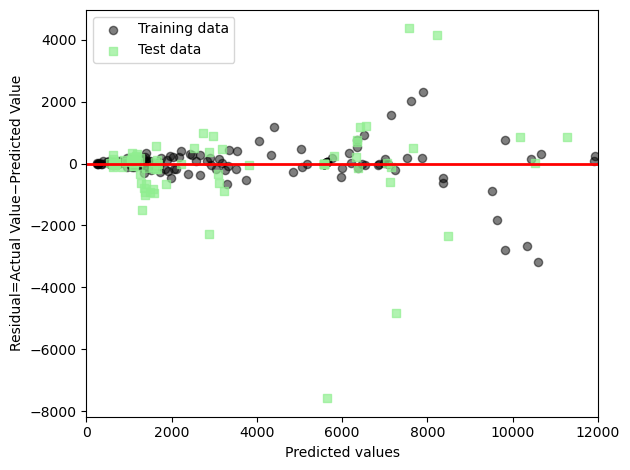

In [126]:
plt.scatter(y_train_pred_rf,  
            y_train_pred_rf - y_train, 
            c = 'black', 
            marker = 'o', 
            s = 35,
            alpha = 0.5,
            label = 'Training data')
plt.scatter(y_test_pred_rf,  
            y_test_pred_rf - y_test, 
            c = 'lightgreen', 
            marker = 's', 
            s = 35,
            alpha = 0.7,
            label = 'Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residual=Actual Value−Predicted Value')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 12000, lw = 2, color = 'red')
plt.xlim([0, 12000])
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

- Hyperparameter Tuning in Random Forest Regression Using RandomizedSearchCV


In [128]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [129]:
param_grid = { 'n_estimators' : [25, 50, 100, 150],
                                  'max_features': ['sqrt', 'log2', None],
                                  'max_depth': [3, 6, 9], 
                                  'max_leaf_nodes': [3, 6, 9]}

In [130]:
random_search = RandomizedSearchCV(rf_model, param_grid, n_iter=100, cv=5)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [3, 6, 9],
                                        'max_features': ['sqrt', 'log2', None],
                                        'max_leaf_nodes': [3, 6, 9],
                                        'n_estimators': [25, 50, 100, 150]})

In [131]:
# Parameter which gives the best results
print(f"Best Hyperparameters: {random_search.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best Score: {random_search.best_score_}")

Best Hyperparameters: {'n_estimators': 100, 'max_leaf_nodes': 9, 'max_features': 'log2', 'max_depth': 9}
Best Score: 0.8733623588936121


# Logistic Regresssion

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, recall_score
from sklearn.preprocessing import StandardScaler

df6_filtered = pd.DataFrame(df4_filtered)
df6_filtered.head()


Statistic Label  Year  Domestic      Reason for Journey      ALOS   ESEX  \
1                2000  Domestic                Business  3.000000  109.5   
2                2000  Domestic  Education and training  5.360317  123.4   
3                2000  Domestic                 Holiday  4.600000  447.7   
4                2000  Domestic           Other reasons  3.200000   68.1   
5                2000  Domestic         Sporting events  5.360317  123.4   

Statistic Label     NUON    NUOT  
1                 1672.0   554.0  
2                  672.0   113.0  
3                11465.0  2516.0  
4                 1916.0   607.0  
5                  672.0   113.0

In [134]:
# Encoding the categorical variables to numerical varianles for classifacition
encoder = LabelEncoder()
df6_filtered['Domestic'] = encoder.fit_transform(df6_filtered['Domestic'])
df6_filtered['Reason for Journey'] = encoder.fit_transform(df6_filtered['Reason for Journey'])

In [135]:
df6_filtered.head()

Statistic Label  Year  Domestic  Reason for Journey      ALOS   ESEX     NUON  \
1                2000         0                   0  3.000000  109.5   1672.0   
2                2000         0                   1  5.360317  123.4    672.0   
3                2000         0                   2  4.600000  447.7  11465.0   
4                2000         0                   3  3.200000   68.1   1916.0   
5                2000         0                   4  5.360317  123.4    672.0   

Statistic Label    NUOT  
1                 554.0  
2                 113.0  
3                2516.0  
4                 607.0  
5                 113.0

In [136]:
#split dataset in features and target variable
feature_cols = ['ALOS', 'ESEX', 'NUON', 'NUOT']
X = df6_filtered[feature_cols]
y = df6_filtered['Reason for Journey']


In [137]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # %80 training, %20 testing

In [138]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [139]:
# Create a logistic regression model
logreg_model = LogisticRegression(solver='lbfgs', max_iter=200,random_state=42)
logreg_model.fit(X_train, y_train)
# Predict on the test set
logreg_pred = logreg_model.predict(X_test)

In [140]:
 # Evaluation of model
accuracy = accuracy_score(y_test, logreg_pred)
confusion_matrix = metrics.confusion_matrix(y_test, logreg_pred)
accuracy,  confusion_matrix

(0.5735294117647058,
 array([[ 8,  0,  0,  0,  2,  0,  0],
        [ 0,  8,  0,  0,  0,  0,  0],
        [ 0,  0,  4,  0,  0,  2,  0],
        [ 3,  1,  1,  7,  0,  0,  0],
        [ 1,  6,  0,  0,  4,  0,  0],
        [ 0,  0,  3,  0,  0,  6,  0],
        [ 0, 10,  0,  0,  0,  0,  2]], dtype=int64))

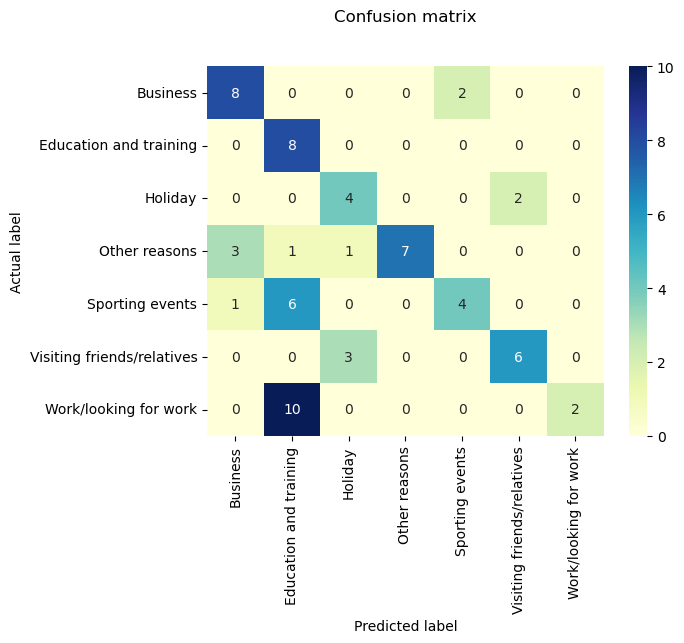

In [141]:
# Setting a confussion matrix to see correlation between target variable
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g',xticklabels=encoder.classes_,yticklabels=encoder.classes_)
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [142]:
#Classification report to see accurate
print(classification_report(y_test, logreg_pred))
print("Accuracy: {:.2f}%".format(accuracy * 100))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.32      1.00      0.48         8
           2       0.50      0.67      0.57         6
           3       1.00      0.58      0.74        12
           4       0.67      0.36      0.47        11
           5       0.75      0.67      0.71         9
           6       1.00      0.17      0.29        12

    accuracy                           0.57        68
   macro avg       0.70      0.61      0.57        68
weighted avg       0.74      0.57      0.56        68

Accuracy: 57.35%


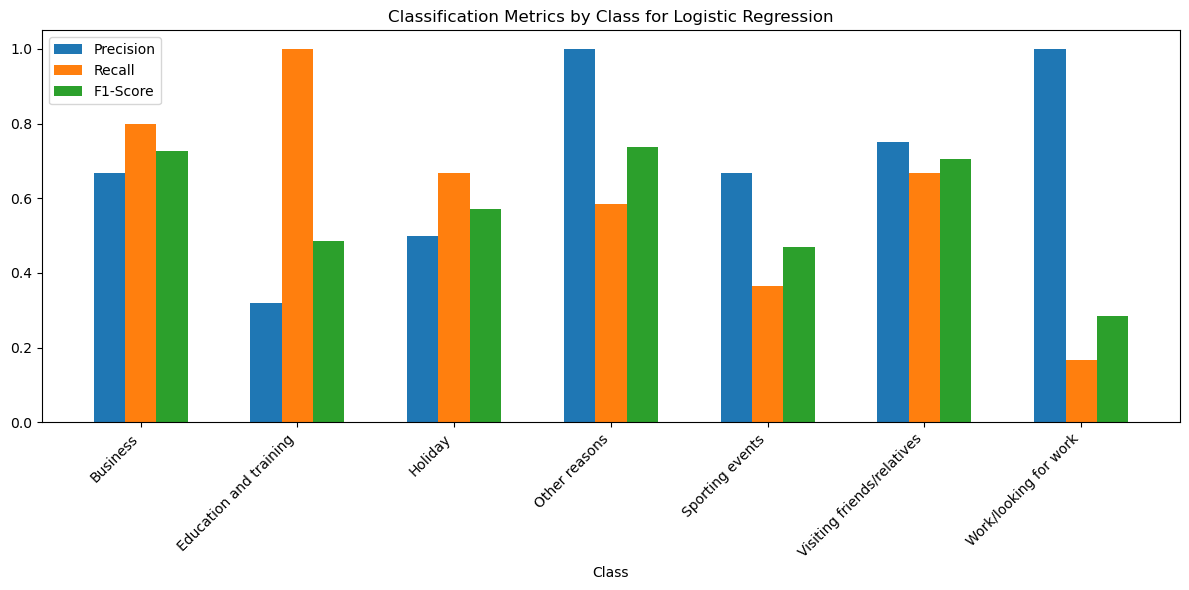

In [143]:
# Extracting metrics from classification report
class_report = classification_report(y_test, logreg_pred, target_names=encoder.classes_, output_dict=True)

# Prepare data for plotting
labels = list(class_report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'
precision = [class_report[label]['precision'] for label in labels]
recall = [class_report[label]['recall'] for label in labels]
f1_score = [class_report[label]['f1-score'] for label in labels]
x = np.arange(len(labels))  # Label locations

# Plotting the metrics
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.2

# Create bars for each metric
ax.bar(x - bar_width, precision, bar_width, label='Precision')
ax.bar(x, recall, bar_width, label='Recall')
ax.bar(x + bar_width, f1_score, bar_width, label='F1-Score')

# Labeling and styling
ax.set_xlabel('Class')
ax.set_title('Classification Metrics by Class for Logistic Regression')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()

- This bar chart is showing precision,recall and F1-Score for each class in "Reason for Journey" column.This visualization
  helps compare the model's performance.

# K-Means Clustering

In [146]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
df6_filtered = pd.DataFrame(df4_filtered)
df6_filtered.head()

Statistic Label  Year  Domestic      Reason for Journey      ALOS   ESEX  \
1                2000  Domestic                Business  3.000000  109.5   
2                2000  Domestic  Education and training  5.360317  123.4   
3                2000  Domestic                 Holiday  4.600000  447.7   
4                2000  Domestic           Other reasons  3.200000   68.1   
5                2000  Domestic         Sporting events  5.360317  123.4   

Statistic Label     NUON    NUOT  
1                 1672.0   554.0  
2                  672.0   113.0  
3                11465.0  2516.0  
4                 1916.0   607.0  
5                  672.0   113.0

In [147]:
# Convert categorical variable 'Reason for Journey' into dummy/indicator variables
df6_filtered_encoded = pd.get_dummies(df6_filtered, columns=['Reason for Journey'], drop_first=True, dtype=int)
df6_filtered_encoded.head() # check dataset after encoding

Year  Domestic      ALOS   ESEX     NUON    NUOT  \
1  2000  Domestic  3.000000  109.5   1672.0   554.0   
2  2000  Domestic  5.360317  123.4    672.0   113.0   
3  2000  Domestic  4.600000  447.7  11465.0  2516.0   
4  2000  Domestic  3.200000   68.1   1916.0   607.0   
5  2000  Domestic  5.360317  123.4    672.0   113.0   

   Reason for Journey_Education and training  Reason for Journey_Holiday  \
1                                          0                           0   
2                                          1                           0   
3                                          0                           1   
4                                          0                           0   
5                                          0                           0   

   Reason for Journey_Other reasons  Reason for Journey_Sporting events  \
1                                 0                                   0   
2                                 0                                   0   
3                                 0                                   0   
4                                 1                                   0   
5                                 0                                   1   

   Reason for Journey_Visiting friends/relatives  \
1                                              0   
2                                              0   
3                                              0   
4                                              0   
5                                              0   

   Reason for Journey_Work/looking for work  
1                                         0  
2                                         0  
3                                         0  
4                                         0  
5                                         0

In [148]:
# Select relevant feautures for clustering
select_features = df6_filtered_encoded[['ESEX', 'NUON']]

In [149]:
## Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(select_features)

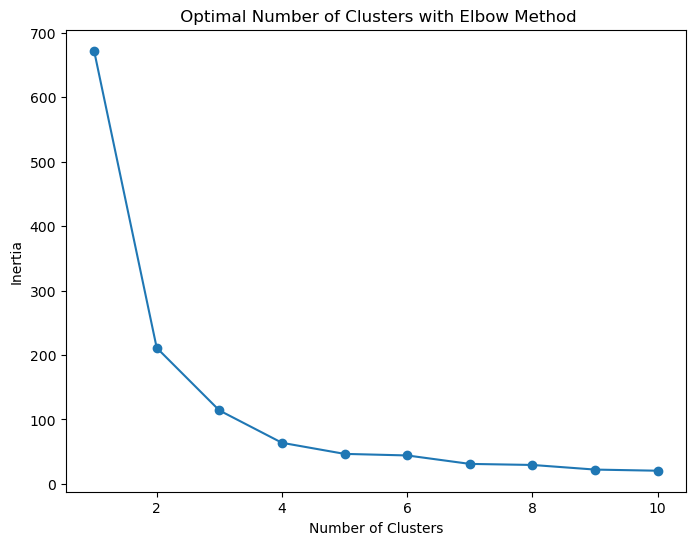

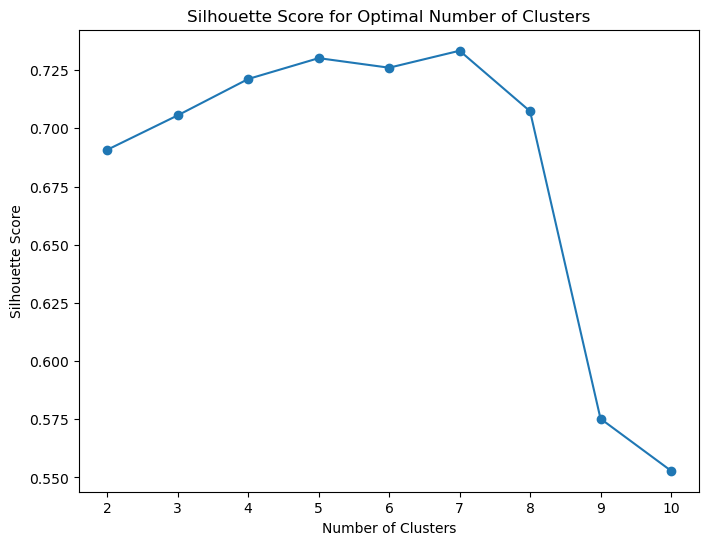

In [150]:
# Find optimal cluster numbers with elbow method
inertia = []
silhouette_scores = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(features_scaled, kmeans.labels_))

# Plot the elbow method to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title(" Optimal Number of Clusters with Elbow Method")
plt.show()

# Plot the silhouette scores to evaluate clustering quality
plt.figure(figsize=(8, 6))
plt.plot(cluster_range[1:], silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal Number of Clusters")
plt.show()

In [151]:
# Perform K-Means clustering with 4 cluster
kmeans = KMeans(n_clusters = 4, max_iter = 300, n_init = 10, random_state = 0)
df6_filtered['Cluster'] = kmeans.fit_predict(features_scaled)

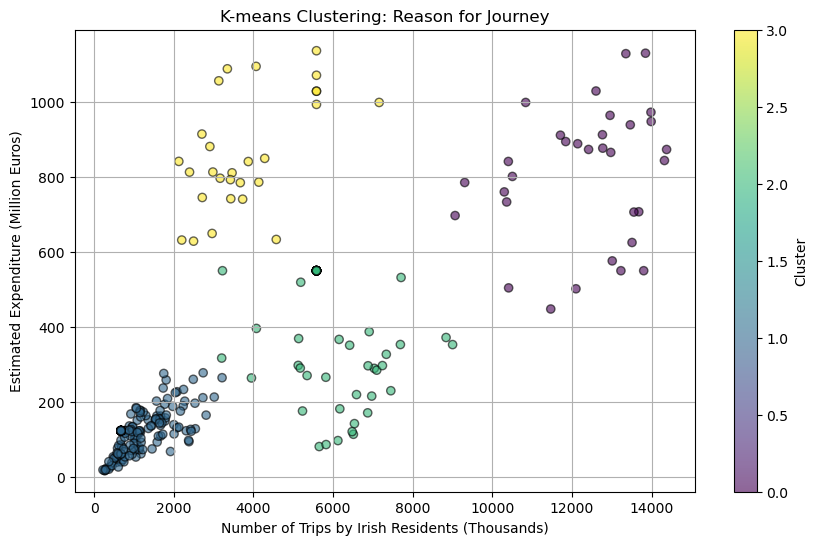

In [152]:
# Create a scatter plot to visualize clusters.
plt.figure(figsize=(10, 6))
plt.scatter(df6_filtered['NUON'], df6_filtered['ESEX'], c=df6_filtered['Cluster'], cmap='viridis', alpha=0.6, edgecolors='k')
plt.title('K-means Clustering: Reason for Journey')
plt.xlabel('Number of Trips by Irish Residents (Thousands)')
plt.ylabel('Estimated Expenditure (Million Euros)')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

- Cluster 0 could show fewer trips and lower expenditure. it could represent individuals short trip such as local travel.
- Cluster 1 can be average trips with average expenditure such as family/friend visit.
- Cluster 2 may be average trips with high expenditure such as luxury holiday or an event holiday.
- Cluster 3 might be higher number of trips combined with high expenditure such as business travel.

In [154]:
kmeans.cluster_centers_

array([[ 1.74961274,  2.51757158],
       [-0.61285554, -0.60615237],
       [ 0.34970002,  0.74300333],
       [ 1.94445119,  0.15847378]])

In [155]:
kmeans_pred = kmeans.fit_predict(features_scaled)
kmeans_pred

array([1, 1, 0, 1, 1, 2, 1, 3, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 3,
       1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 3, 1, 2, 1, 1, 2, 1, 1, 1,
       0, 1, 1, 2, 1, 3, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 3, 1, 2,
       1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 3, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1,
       1, 2, 1, 3, 1, 2, 1, 1, 0, 1, 1, 1, 3, 1, 1, 2, 1, 3, 1, 2, 1, 1,
       0, 1, 1, 1, 3, 1, 1, 2, 1, 3, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2,
       1, 3, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 3, 1, 2, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 2, 1, 3, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 3,
       1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 3, 1, 2, 1, 1, 0, 1, 1, 1,
       3, 1, 1, 2, 1, 3, 1, 2, 1, 1, 0, 1, 1, 1, 3, 1, 1, 2, 1, 3, 1, 2,
       1, 1, 0, 1, 1, 1, 3, 1, 1, 2, 1, 3, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 2, 1, 3, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 3, 1, 2, 1, 1,
       0, 1, 1, 1, 2, 1, 1, 2, 1, 3, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1,

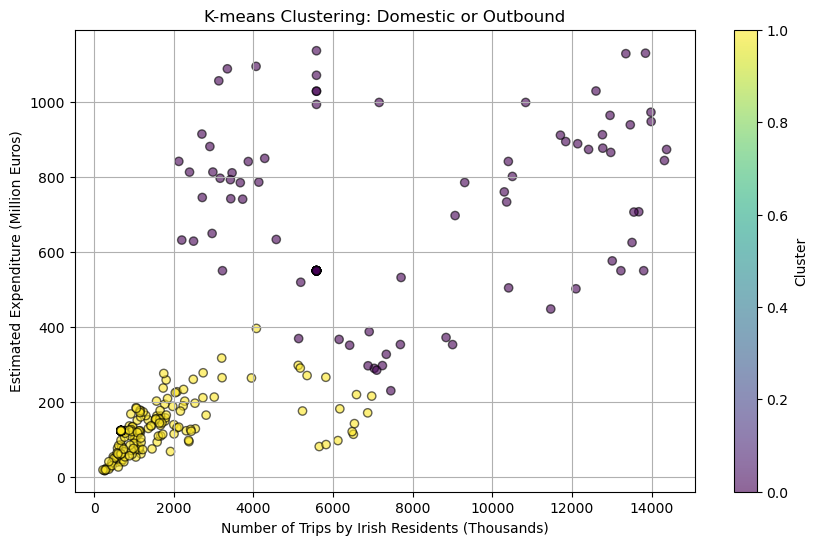

In [156]:
# Perform K-Means clustering with 4 cluster
kmeans = KMeans(n_clusters = 2, max_iter = 300, n_init = 10, random_state = 0)
df6_filtered['Cluster'] = kmeans.fit_predict(features_scaled)

# Create a scatter plot to visualize clusters.
plt.figure(figsize=(10, 6))
plt.scatter(df6_filtered['NUON'], df6_filtered['ESEX'], c=df6_filtered['Cluster'], cmap='viridis', alpha=0.6, edgecolors='k')
plt.title('K-means Clustering: Domestic or Outbound')
plt.xlabel('Number of Trips by Irish Residents (Thousands)')
plt.ylabel('Estimated Expenditure (Million Euros)')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

- When we try n_cluster = 2 , we will get the graph whic above.
- Cluster 0 can be domestic travel such as local travel, friend/family visit.
- Cluster 1 might be outbound travel such as holiday, event or business trip.